# IMPORT LIBRARIES/DATASETS

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
%cd C:\Users\Administrator\Desktop\Notebooks\food11

C:\Users\Administrator\Desktop\Notebooks\food11


In [3]:
# List all folders under training

['Bread',
 'Dairy product',
 'Dessert',
 'Egg',
 'Fried food',
 'Meat',
 'Noodles-Pasta',
 'Rice',
 'Seafood',
 'Soup',
 'Vegetable-Fruit']

In [4]:
# List all folders under validation

['Bread',
 'Dairy product',
 'Dessert',
 'Egg',
 'Fried food',
 'Meat',
 'Noodles-Pasta',
 'Rice',
 'Seafood',
 'Soup',
 'Vegetable-Fruit']

In [5]:
# Check the number of images in training, validation and evaluation dataset
train = []
valid = []
test = []

# os.listdir returns the list of files in the folder, in this case image class names

print('Number of train images: {} \nNumber of validation images: {} \nNumber of test images: {}'.format(len(train),len(valid),len(test)))


Number of train images: 9866 
Number of validation images: 3430 
Number of test images: 3347


In [ ]:
train

# DATA EXPLORATION AND DATA VISUALIZATION

In [ ]:
train_class = os.listdir(os.path.join('training','Seafood'))
train_class

# Visualize the images in the dataset

fig, axs = plt.subplots(11, 5, figsize = (32,32))
count = 0
# for every class in the dataset
for i in os.listdir('./training'):
  # get the list of all images that belong to a particular class
  train_class = os.listdir(os.path.join('training', i))
  
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('training', i, train_class[j])
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(PIL.Image.open(img))  
  count += 1

fig.tight_layout()


In [8]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./training'):
  Class_name.append(i)
  train_class = os.listdir(os.path.join('training',i))
  print('Number of images in {}={}\n'.format(i,len(train_class)))
  No_images_per_class.append(len(train_class))

Number of images in Bread=994

Number of images in Dairy product=429

Number of images in Dessert=1500

Number of images in Egg=986

Number of images in Fried food=848

Number of images in Meat=1325

Number of images in Noodles-Pasta=440

Number of images in Rice=280

Number of images in Seafood=855

Number of images in Soup=1500

Number of images in Vegetable-Fruit=709



In [9]:
No_images_per_class

[994, 429, 1500, 986, 848, 1325, 440, 280, 855, 1500, 709]

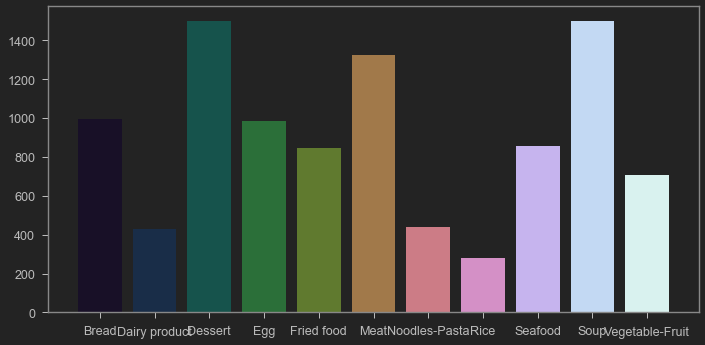

In [10]:
# visualize the number of images in each class in the training dataset

fig = plt.figure(figsize=(10,5))
plt.bar(Class_name, No_images_per_class, color = sns.color_palette("cubehelix",len(Class_name)))
fig.tight_layout()

# IMAGE AUGMENTATION AND CREATE DATA GENERATOR

In [13]:
# create run-time augmentation on training and test dataset
# For training datagenerator,  we add normalization, shear angle, zooming range and horizontal flip


# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create data generator for training, validation and test dataset.
train_generator = train_datagen.flow_from_directory(
        'training',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'evaluation',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')


# BUILDING DEEP LEARNING MODEL USING PRE-TRAINED INCEPTIONRESNETV2

In [ ]:
# load the inception resnetv2 model
# basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256,256,3)))

In [ ]:
# print the model summary
basemodel.summary()

In [ ]:
# Freeze the basemodel weights , so these weights won't change during training


In [ ]:
# Add classification head to the model
model = Model(inputs = basemodel.input, outputs = headmodel)

# COMPILING AND TRAIN DEEP LEARNING MODEL

In [ ]:
# compile the model


In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 32, epochs = 1, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer, earlystopping])

# TUNING THE TRAINED MODEL

In [ ]:
# unfreeze the weights in the base model, now these weights will be changed during training


In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights_fine.hdf5", verbose=1, save_best_only=True)

In [ ]:
# fine tune the model with very low learning rate
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 32, epochs = 10, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer, earlystopping])

# ASSESSING THE PERFORMANCE OF THE TRAINED MODEL

In [ ]:
# Load a pretrained weight


In [ ]:
# Evaluate the performance of the model
evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

In [ ]:
# assigning label names to the corresponding indexes
labels = {0: 'Bread', 1: 'Dairy product', 2: 'Dessert', 3:'Egg', 4: 'Fried food', 5:'Meat',6:'Noodles-Pasta',7:'Rice', 8:'Seafood',9:'Soup',10: 'Vegetable-Fruit'}

In [ ]:
# loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0
for i in os.listdir('./evaluation'):
  for item in os.listdir(os.path.join('./evaluation',i)):
    #code to open the image
    img= PIL.Image.open(os.path.join('./evaluation',i,item))
    #resizing the image to (256,256)
    img = img.resize((256,256))
    #appending image to the image list
    image.append(img)
    #converting image to array
    img = np.asarray(img, dtype= np.float32)
    #normalizing the image
    img = img / 255
    #reshaping the image in to a 4D array
    img = img.reshape(-1,256,256,3)
    #making prediction of the model
    predict = model.predict(img)
    #getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    #appending the predicted class to the list
    prediction.append(labels[predict])
    #appending original class to the list
    original.append(i)


In [ ]:
# Getting the test accuracy 


In [ ]:
# visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [ ]:
# classification report


In [ ]:
# plot confusion matrix

plt.figure(figsize=(20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


# VALIDATION DATA VISUALIZATION

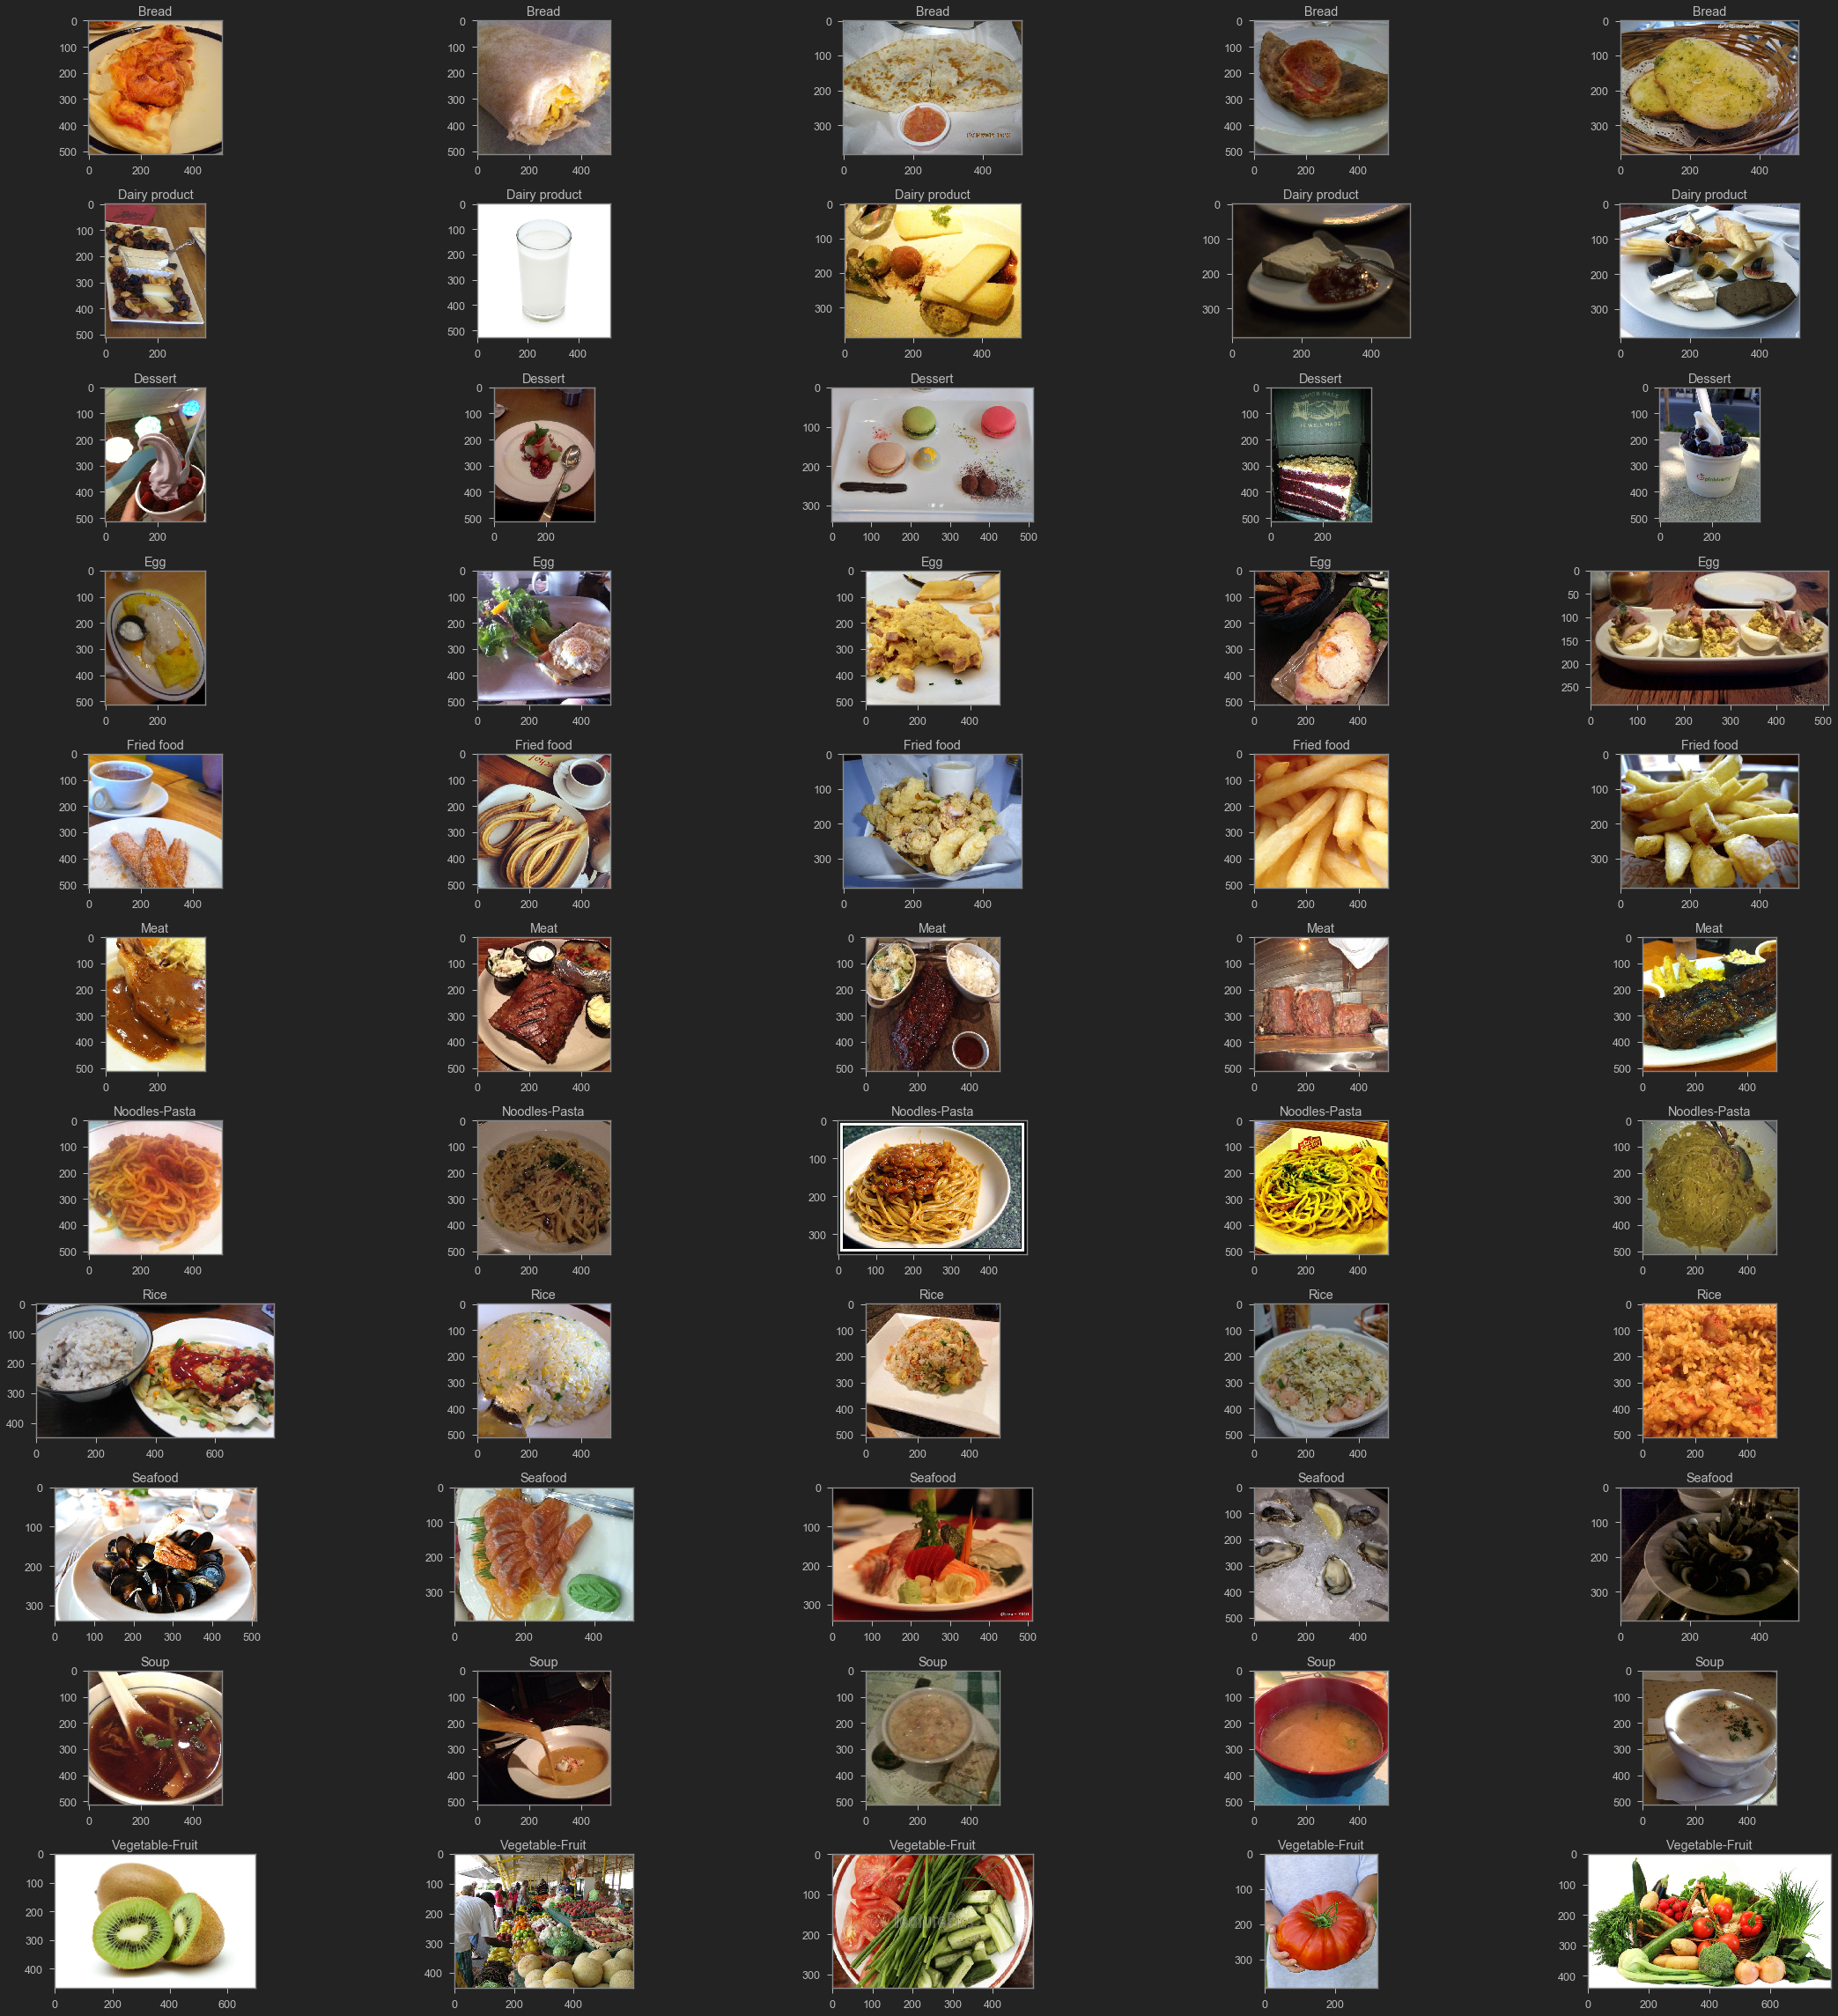

In [12]:
fig, axes = plt.subplots(11,5, figsize=(32,32))
count = 0
for i in os.listdir('./validation'):
  # get the list of images in the particualr class 
  validation_class = os.listdir(os.path.join('validation',i))
  # plot 3 images per class
  for j in range(5):
    img = os.path.join('validation', i, validation_class[j])
    img = PIL.Image.open(img)
    axes[count][j].title.set_text(i)
    axes[count][j].imshow(img)  
  count += 1

fig.tight_layout()